<a href="https://colab.research.google.com/github/Zenologos/Praxis/blob/main/ANOVA_test_MAIN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.reneshbedre.com/blog/anova.html


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
!pip install "statsmodels==0.12.2"

     |████████████████████████████████| 9.5 MB 5.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install "tslearn==0.5.2"

     |████████████████████████████████| 793 kB 5.1 MB/s 


In [ ]:
!pip install bioinfokit

     |████████████████████████████████| 84 kB 2.2 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.6-py3-none-any.whl size=57066 sha256=69435714f8b4cb1113dbcf3a8731dfd70aad47c06f15c9d3fff6ec95138ffb82
  Stored in directory: /root/.cache/pip/wheels/38/b2/a0/3f65c463d3faababa8cb5f3076e3bfc1c49fea2a736a49038a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=d315f9001bb822fb4cb4e98eb1b0bc9ac20f03466d128d6cf7336b912d9b44dc
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [ ]:
#for ANOVA
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

In [ ]:
#General python libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os, sys
from os.path import *
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from mpmath import *


In [ ]:
#Modules for statistical models
from statsmodels.tsa.forecasting.theta import ThetaModel
from statsmodels.tsa.api import SimpleExpSmoothing

In [ ]:
#Modules for ML models
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.neighbors import KNeighborsTimeSeriesRegressor
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import  MLPRegressor

In [ ]:
#for ANOVA
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
root_path = 'gdrive/My Drive/Praxis/Data'  #change dir to your project folder

In [ ]:
# hypothesis number and file
hypothesis = 5 
file = 'H1_errors.csv'

In [ ]:
file = 'H1_errors.csv'

In [ ]:
#CHANGE if you want scaling or not for the ML models
SCALE = True

In [ ]:
datafolder = join(root_path,file)

In [ ]:
errors = pd.read_csv(datafolder)

In [ ]:
errors.shape

(26322, 15)

In [ ]:
df.head()

,repair_part_number,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,...,299.0,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,323.0,324.0,325.0,326.0,327.0,328.0,329.0,330.0,331.0,332.0,333.0,334.0,adi,avg_demand,variance,cv2
0,011-175-0362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.750000,5.500000,20.250000,0.669421
1,0177C1005-9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,109.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,434.0,0.0,0.0,0.0,0.0,0.0,18.611111,51.166667,9720.250000,3.712814
2,0177C1005LF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,26.0,0.0,0.0,0.0,0.0,18.0,10.0,20.0,0.0,13.0,17.0,27.0,23.0,64.0,2.0,53.0,0.0,15.0,20.0,11.0,...,0.0,186.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,530.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,0.0,0.0,0.0,0.0,0.0,2.310345,32.193103,3842.362711,3.707428
3,01G-P3-2631-KR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.833333,2.000000,1.333333,0.333333
4,02-0709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.666667,1.000000,0.000000,0.000000


In [ ]:

df.columns

Index(['repair_part_number', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0',
       '7.0', '8.0',
       ...
       '329.0', '330.0', '331.0', '332.0', '333.0', '334.0', 'adi',
       'avg_demand', 'variance', 'cv2'],
      dtype='object', length=340)

In [ ]:
df.isnull().sum()

repair_part_number    0
0.0                   0
1.0                   0
2.0                   0
3.0                   0
                     ..
334.0                 0
adi                   0
avg_demand            0
variance              0
cv2                   0
Length: 340, dtype: int64

In [ ]:
df.isnull().values.sum()

0

In [ ]:
df.index

RangeIndex(start=0, stop=1866, step=1)

In [ ]:
if hypothesis == 3:
  # df.insert(loc=[1,3,4,5,6,7,8,9,10,11,12,13], column=[df'0.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0','12.0'], value=0)
  df.insert(loc=1, column='0.0', value=0.0)
  df.insert(loc=3, column='2.0', value=0.0)
  df.insert(loc=4, column='3.0', value=0.0)
  df.insert(loc=5, column='4.0', value=0.0)
  df.insert(loc=6, column='5.0', value=0.0)
  df.insert(loc=7, column='6.0', value=0.0)
  df.insert(loc=8, column='7.0', value=0.0)
  df.insert(loc=9, column='8.0', value=0.0)
  df.insert(loc=10, column='9.0', value=0.0)
  df.insert(loc=11, column='10.0', value=0.0)
  df.insert(loc=12, column='11.0', value=0.0)
  df.insert(loc=13, column='12.0', value=0.0)

In [ ]:
df

,repair_part_number,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,...,299.0,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,323.0,324.0,325.0,326.0,327.0,328.0,329.0,330.0,331.0,332.0,333.0,334.0,adi,avg_demand,variance,cv2
0,011-175-0362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.750000,5.500000,20.250000,0.669421
1,0177C1005-9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,109.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,434.0,0.0,0.0,0.0,0.0,0.0,18.611111,51.166667,9720.250000,3.712814
2,0177C1005LF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,26.0,0.0,0.0,0.0,0.0,18.0,10.0,20.0,0.0,13.0,17.0,27.0,23.0,64.0,2.0,53.0,0.0,15.0,20.0,11.0,...,0.0,186.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,530.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,0.0,0.0,0.0,0.0,0.0,2.310345,32.193103,3842.362711,3.707428
3,01G-P3-2631-KR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.833333,2.000000,1.333333,0.333333
4,02-0709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.666667,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,XTI1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.500000,1.000000,0.000000,0.000000
1862,Y3644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.500000,1.000000,0.000000,0.000000
1863,YT900294801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.000000,1.000000,0.000000,0.000000
1864,Z0RG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.000000,1.000000,0.000000,

In [ ]:
  if hypothesis == 3:
    df.insert(loc=332, column='331.0', value=0.0)
    df.insert(loc=333, column='332.0', value=0.0)
    df.insert(loc=334, column='333.0', value=0.0)
    df.insert(loc=335, column='334.0', value=0.0)

In [ ]:
# df.columns.get_loc("adi")

In [ ]:
df

,repair_part_number,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,...,299.0,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,323.0,324.0,325.0,326.0,327.0,328.0,329.0,330.0,331.0,332.0,333.0,334.0,adi,avg_demand,variance,cv2
0,011-175-0362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.750000,5.500000,20.250000,0.669421
1,0177C1005-9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,109.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,434.0,0.0,0.0,0.0,0.0,0.0,18.611111,51.166667,9720.250000,3.712814
2,0177C1005LF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,26.0,0.0,0.0,0.0,0.0,18.0,10.0,20.0,0.0,13.0,17.0,27.0,23.0,64.0,2.0,53.0,0.0,15.0,20.0,11.0,...,0.0,186.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,530.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,0.0,0.0,0.0,0.0,0.0,2.310345,32.193103,3842.362711,3.707428
3,01G-P3-2631-KR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.833333,2.000000,1.333333,0.333333
4,02-0709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.666667,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,XTI1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.500000,1.000000,0.000000,0.000000
1862,Y3644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.500000,1.000000,0.000000,0.000000
1863,YT900294801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.000000,1.000000,0.000000,0.000000
1864,Z0RG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.000000,1.000000,0.000000,

In [ ]:
# Cutoff - June 1,2017 - Cut off 282 out of 334 weeks - for all years # for H1,H2, H3 and H4
# Cutoff - June 1, 2013 - 73 out of 104 weeks - test size = 104-73 = 31 weeks - for 0-2 years for H5
# Cutoff - June 1, 2015 - 178 out of 208 weeks - test size = 208 - 178 = 30 weeks for 0-4 years for H5
df_train = df.loc[:,'0.0':'282.0'].copy()
df_test = df.loc[:,'282.0':'334.0'].copy()

In [ ]:
df_train.shape, df_test.shape, df.shape

((1866, 283), (1866, 53), (1866, 340))

In [ ]:
df_train

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,...,243.0,244.0,245.0,246.0,247.0,248.0,249.0,250.0,251.0,252.0,253.0,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0,270.0,271.0,272.0,273.0,274.0,275.0,276.0,277.0,278.0,279.0,280.0,281.0,282.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,4.0,22.0,0.0,14.0,0.0,126.0,0.0,34.0,0.0,24.0,0.0,12.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,16.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,26.0,0.0,0.0,0.0,0.0,18.0,10.0,20.0,0.0,13.0,17.0,27.0,23.0,64.0,2.0,53.0,0.0,15.0,20.0,11.0,5.0,...,0.0,25.0,32.0,24.0,36.0,0.0,14.0,60.0,126.0,0.0,32.0,152.0,42.0,10.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,32.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test

,282.0,283.0,284.0,285.0,286.0,287.0,288.0,289.0,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,323.0,324.0,325.0,326.0,327.0,328.0,329.0,330.0,331.0,332.0,333.0,334.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,434.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,530.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Code from Nicholas Vandeput. Change alpha, beta and extra_periods values here. extra_periods is the forecating horizon(h)
# extra_periods = 53 (for entire time range), 32(for 0 - 2 yrs), 31 (for 0 - 4 yrs)
def Croston_TSB(train_row,test_row,extra_periods=53,alpha=0.2,beta=0.2): # CHANGE the time period here for H5
  d = np.array(train_row) # Transform the input into a numpy array
  cols = len(d) # Historical period length
  d = np.append(d,[np.nan]*extra_periods) # Append np.nan into the demand array to cover future periods
  
  #level (a), probability(p) and forecast (f)
  a,p,f = np.full((3,cols+extra_periods),np.nan)
# Initialization
  first_occurence = np.argmax(d[:cols]>0)
  a[0] = d[first_occurence]
  p[0] = 1/(1 + first_occurence)
  f[0] = p[0]*a[0]
                
  # Create all the t+1 forecasts
  for t in range(0,cols):
    if d[t] > 0:
      a[t+1] = alpha*d[t] + (1-alpha)*a[t] 
      p[t+1] = beta*(1) + (1-beta)*p[t]  
    else:
      a[t+1] = a[t]
      p[t+1] = (1-beta)*p[t]       
      f[t+1] = p[t+1]*a[t+1]
      
  # Future Forecast
  a[cols+1:cols+extra_periods] = a[cols]
  p[cols+1:cols+extra_periods] = p[cols]
  f[cols+1:cols+extra_periods] = f[cols]
                    
  pred = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Period":p,"Level":a,"Error":d-f})
  pred.fillna(value=0,inplace=True) # to take care of Nan values 
  rmse_value = mean_squared_error(test_row,pred.loc[283:,'Forecast'],squared=False) # CHANGE the time period here for H5
  mae_value = mean_absolute_error(test_row,pred.loc[283:,'Forecast']) # CHANGE the time period here for H5

  return rmse_value, mae_value # CHANGE the time period here for H5

In [ ]:
def SES_model(train_row,test_row):
  #input this function is a single row (representing each repair part number)with demand numbers for all periods in either train/test set
  ses = SimpleExpSmoothing(train_row).fit() 
  # print(ses.summary()) # if summary statistics needed for individual row for study.
  fcast = ses.forecast(len(test_row))
  rmse_value = mean_squared_error(test_row,fcast, squared= False)
  mae_value = mean_absolute_error(test_row, fcast)
  return rmse_value, mae_value

In [ ]:
def DOTM_model(train_row,test_row):
  #input this function is a single row (representing each repair part number)with demand numbers for all periods in either train/test set
  # train_row.set_index
  dotm = ThetaModel(train_row,deseasonalize=False).fit() 
  # print(dotm.summary()) # if summary statistics needed for individual row for study.
  fcast = dotm.forecast(len(test_row))
  rmse_value = mean_squared_error(test_row,fcast, squared= False)
  mae_value = mean_absolute_error(test_row, fcast)
  return rmse_value, mae_value

In [ ]:
#call this function for each row and then fit model
# split a univariate sequence into samples.
# convert data into a supervised learning problem using a sliding window.
# step_back = 4 (one month)
def split_row(row, step_back): 
	X, y = list(), list()
	for i in range(len(row)):
		# find the end of this pattern
		end_ix = i + step_back
		# check if we are beyond the sequence
		if end_ix > len(row)-1:
			break
		# gather input and output parts of the pattern
		row_x, row_y = row[i:end_ix], row[end_ix]
		X.append(row_x)
		y.append(row_y)
	return np.array(X), np.array(y)

In [ ]:
def models(train_row,test_row,SCALE):
  #input this function is a single row (representing each repair part number)with demand numbers for all periods in either train/test set
  #define look back period for generating dataset # have kept a default of 4 (i.e. 1 month)
  #call function to split each row into feature matrix and target
  
  step_back = 4 #CHANGE HERE
  X_train, y_train = split_row(train_row,step_back)
  X_test, y_test = split_row(test_row,step_back)
  
  if SCALE == True:
    X_train = TimeSeriesScalerMinMax().fit_transform(X_train)
    X_test = TimeSeriesScalerMinMax().fit_transform(X_test)

    # a,b,c = X_train.shape
    # x,y,z = X_test.shape
    # X_train = X_train.reshape((a,b*c))
    # X_test = X_test.reshape((x,y*z))
    
    #IF THE ABOVE 4 LINES OF CODE GIVE AN ERROR, RUN THE NEXT TWO LINES INSTEAD. 
    X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]))

  rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators = 10, max_depth = 5) #CHANGE MODEL HERE AS PER NESTED CV RESULTS
  svr = SVR(kernel='rbf',C=0.001,epsilon=0.001,shrinking=True) #CHANGE MODEL HERE AS PER NESTED CV RESULTS
  knn = KNeighborsTimeSeriesRegressor(metric="dtw",n_jobs=-1,n_neighbors=5) #CHANGE MODEL HERE AS PER NESTED CV RESULTS
  mlp = MLPRegressor(hidden_layer_sizes =(3,3,3),activation="relu" ,random_state=1, max_iter=2000)

  knn.fit(X_train, y_train) 
  rf.fit(X_train, y_train)
  svr.fit(X_train, y_train)
  mlp.fit(X_train, y_train)

  rmse_tsb, mae_tsb = Croston_TSB(train_row, test_row)
  rmse_ses, mae_ses = SES_model(train_row, test_row)
  rmse_dotm, mae_dotm = DOTM_model(train_row,test_row)

  rmse_knn = mean_squared_error(y_test,knn.predict(X_test), squared= False)
  mae_knn = mean_absolute_error(y_test, knn.predict(X_test))

  rmse_rf = mean_squared_error(y_test,rf.predict(X_test), squared= False)
  mae_rf = mean_absolute_error(y_test, rf.predict(X_test))

  rmse_svr = mean_squared_error(y_test,svr.predict(X_test), squared= False)
  mae_svr = mean_absolute_error(y_test, svr.predict(X_test))

  rmse_mlp = mean_squared_error(y_test,mlp.predict(X_test), squared= False)
  mae_mlp = mean_absolute_error(y_test, mlp.predict(X_test))

  return rmse_tsb, rmse_ses, rmse_dotm, rmse_knn, rmse_rf, rmse_svr, rmse_mlp, mae_tsb, mae_ses, mae_dotm, mae_knn, mae_rf, mae_svr, mae_mlp

In [ ]:
errors = pd.DataFrame()

In [ ]:
#you can ignore the warnings displayed for dotm
%%capture
errors[['rmse_tsb','rmse_ses','rmse_dotm', 'rmse_knn', 'rmse_rf', 'rmse_svr', 'rmse_mlp', 'mae_tsb', 'mae_ses', 'mae_dotm', 'mae_knn', 'mae_rf', 'mae_svr', 'mae_mlp']] = df_train.apply(lambda train_row: models(train_row,df_test.iloc[train_row.name],SCALE), axis=1, result_type='expand')

In [ ]:
errors

""


In [ ]:
errors.to_csv('H3_errors.csv')

In [ ]:
#STOP!!!
#save file on google drive
#change the path to save this errors.csv file

!cp H3_errors.csv /content/gdrive/MyDrive/Corey_Hendricks/Data

cp: cannot create regular file '/content/gdrive/MyDrive/Corey_Hendricks/Data': No such file or directory


In [ ]:
# file = 'H3_errors.csv'
# datafolder = join(root_path,file)
# hypothesis=3
# SCALE=True
# errors = pd.read_csv(datafolder)
# errors.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
rmse_fvalue, rmse_pvalue = stats.f_oneway(errors['rmse_tsb'],errors['rmse_ses'],errors['rmse_dotm'],errors['rmse_knn'],errors['rmse_rf'],errors['rmse_svr'],errors['rmse_mlp'])

In [ ]:
print(f'f and p value of RMSE values of all models is {rmse_fvalue} and {rmse_pvalue} respectively, for Hypothesis {hypothesis} , with no scaling of statistical models, and SCALE = {SCALE} for ML models') 

f and p value of RMSE values of all models is 0.6782710329164876 and 0.6672545823978647 respectively, for Hypothesis 5 , with no scaling of statistical models, and SCALE = True for ML models


In [ ]:
mae_fvalue, mae_pvalue = stats.f_oneway(errors['mae_tsb'],errors['mae_ses'],errors['mae_dotm'],errors['mae_knn'],errors['mae_rf'],errors['mae_svr'],errors['mae_mlp'])

In [ ]:
print(f'f and p value of MAE values of all models is {mae_fvalue} and {mae_pvalue} respectively, for Hypothesis {hypothesis} , with no scaling of statistical models, and SCALE = {SCALE} for ML models') 

f and p value of MAE values of all models is 3.0667327656945247 and 0.005307278776033189 respectively, for Hypothesis 5 , with no scaling of statistical models, and SCALE = True for ML models


In [ ]:
errors 

,Unnamed: 0,rmse_tsb,rmse_ses,rmse_dotm,rmse_knn,rmse_rf,rmse_svr,rmse_mlp,mae_tsb,mae_ses,mae_dotm,mae_knn,mae_rf,mae_svr,mae_mlp
0,0,1.210000e-19,0.003534,0.003476,0.000000,0.005443,0.001000,0.004749,1.210000e-19,0.003534,0.003471,0.000000,0.005443,0.001000,0.004749
1,1,7.614636e-01,0.734592,0.732511,0.799104,0.913137,0.820049,0.796625,3.987030e-01,0.461973,0.473385,0.401561,0.542461,0.347695,0.435461
2,2,1.020579e-01,0.763203,0.720166,3.088235,0.611732,0.001393,0.725671,1.020579e-01,0.763203,0.720133,3.088235,0.611732,0.001393,0.725671
3,3,2.512816e-01,0.360729,0.397851,0.000000,0.040508,0.001000,0.078859,2.512816e-01,0.360729,0.397729,0.000000,0.040508,0.001000,0.078859
4,4,1.373606e-01,0.137361,0.137361,0.142857,0.142857,0.142857,0.162578,1.886793e-02,0.018868,0.018868,0.020408,0.020408,0.020408,0.040882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26317,26317,3.031690e-01,0.310978,0.315942,0.319935,0.326992,0.319160,0.324808,8.318391e-02,0.177948,0.194443,0.067227,0.112657,0.062531,0.122068
26318,26318,1.770000e-15,0.003534,0.000045,0.000000,0.005067,0.001000,0.003577,1.770000e-15,0.003534,0.000041,0.000000,0.005067,0.001000,0.003577
26319,26319,3.020000e-19,0.017668,0.016186,0.000000,0.016938,0.001000,0.021032,3.020000e-19,0.017668,0.016144,0.000000,0.016938,0.001000,0.021032
26320,26320,4.120817e-01,0.409407,0.441052,0.428942,0.433542,0.428430,0.426350,5.660377e-02,0.141609,0.163281,0.064826,0.142018,0.062184,0.138315


In [ ]:
errors.mean()

Unnamed: 0    13160.500000
rmse_tsb          0.797682
rmse_ses          0.822136
rmse_dotm         0.870286
rmse_knn          0.767869
rmse_rf           0.834813
rmse_svr          0.656096
rmse_mlp          0.765992
mae_tsb           0.377782
mae_ses           0.475834
mae_dotm          0.531285
mae_knn           0.408944
mae_rf            0.426322
mae_svr           0.244982
mae_mlp           0.400333
dtype: float64

In [ ]:
errors.min()

Unnamed: 0    0.000000
rmse_tsb      0.000000
rmse_ses      0.000000
rmse_dotm     0.000000
rmse_knn      0.000000
rmse_rf       0.000000
rmse_svr      0.000000
rmse_mlp      0.000285
mae_tsb       0.000000
mae_ses       0.000000
mae_dotm      0.000000
mae_knn       0.000000
mae_rf        0.000000
mae_svr       0.000000
mae_mlp       0.000285
dtype: float64

In [ ]:
errors.max()

Unnamed: 0    26321.000000
rmse_tsb       1537.464250
rmse_ses       1116.536390
rmse_dotm      1179.296165
rmse_knn       1055.793876
rmse_rf        1203.900816
rmse_svr       1132.409296
rmse_mlp       1446.075771
mae_tsb        1143.113208
mae_ses         937.860153
mae_dotm       1005.202077
mae_knn         769.132053
mae_rf          830.750606
mae_svr         754.549060
mae_mlp        1025.001756
dtype: float64

In [ ]:
rmse_df = errors.copy()

In [ ]:
rmse_df.drop(columns=['mae_tsb', 'mae_ses', 'mae_dotm', 'mae_knn', 'mae_rf', 'mae_svr', 'mae_mlp'],inplace=True)

In [ ]:
mae_df = errors.copy()

In [ ]:
mae_df.drop(columns=['rmse_tsb', 'rmse_ses', 'rmse_dotm', 'rmse_knn', 'rmse_rf', 'rmse_svr', 'rmse_mlp'],inplace=True)

In [ ]:
rmse_df

,Unnamed: 0,rmse_tsb,rmse_ses,rmse_dotm,rmse_knn,rmse_rf,rmse_svr,rmse_mlp
0,0,1.210000e-19,0.003534,0.003476,0.000000,0.005443,0.001000,0.004749
1,1,7.614636e-01,0.734592,0.732511,0.799104,0.913137,0.820049,0.796625
2,2,1.020579e-01,0.763203,0.720166,3.088235,0.611732,0.001393,0.725671
3,3,2.512816e-01,0.360729,0.397851,0.000000,0.040508,0.001000,0.078859
4,4,1.373606e-01,0.137361,0.137361,0.142857,0.142857,0.142857,0.162578
...,...,...,...,...,...,...,...,...
26317,26317,3.031690e-01,0.310978,0.315942,0.319935,0.326992,0.319160,0.324808
26318,26318,1.770000e-15,0.003534,0.000045,0.000000,0.005067,0.001000,0.003577
26319,26319,3.020000e-19,0.017668,0.016186,0.000000,0.016938,0.001000,0.021032
26320,26320,4.120817e-01,0.409407,0.441052,0.428942,0.433542,0.428430,0.426350


In [ ]:
rmse_melt = pd.melt(rmse_df.reset_index(), id_vars=['index'], value_vars=['rmse_tsb', 'rmse_ses', 'rmse_dotm', 'rmse_knn', 'rmse_rf', 'rmse_svr', 'rmse_mlp'])

In [ ]:
rmse_melt

,index,variable,value
0,0,rmse_tsb,1.210000e-19
1,1,rmse_tsb,7.614636e-01
2,2,rmse_tsb,1.020579e-01
3,3,rmse_tsb,2.512816e-01
4,4,rmse_tsb,1.373606e-01
...,...,...,...
184249,26317,rmse_mlp,3.248076e-01
184250,26318,rmse_mlp,3.576804e-03
184251,26319,rmse_mlp,2.103175e-02
184252,26320,rmse_mlp,4.263497e-01


In [ ]:
rmse_melt.columns = ['index', 'Forecast_Method', 'value']

In [ ]:
rmse_melt

,index,Forecast_Method,value
0,0,rmse_tsb,1.210000e-19
1,1,rmse_tsb,7.614636e-01
2,2,rmse_tsb,1.020579e-01
3,3,rmse_tsb,2.512816e-01
4,4,rmse_tsb,1.373606e-01
...,...,...,...
184249,26317,rmse_mlp,3.248076e-01
184250,26318,rmse_mlp,3.576804e-03
184251,26319,rmse_mlp,2.103175e-02
184252,26320,rmse_mlp,4.263497e-01


In [ ]:
rmse_model = ols('value ~ Forecast_Method', data=rmse_melt).fit()
rmse_anova_table = sm.stats.anova_lm(rmse_model, typ=2)
rmse_anova_table

,sum_sq,df,F,PR(>F)
Forecast_Method,7.504272e+02,6.0,0.678271,0.667255
Residual,3.397461e+07,184247.0,NaN,NaN


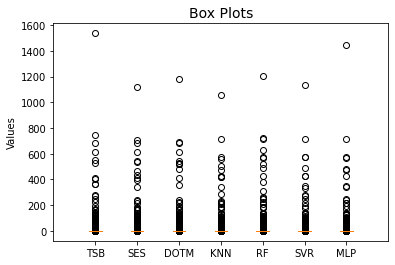

In [ ]:
fig, ax = plt.subplots()
plt.boxplot(errors['rmse_tsb'], positions = [0.5])
plt.boxplot(errors['rmse_ses'], positions = [1])
plt.boxplot(errors['rmse_dotm'], positions = [1.5])
plt.boxplot(errors['rmse_knn'], positions = [2])
plt.boxplot(errors['rmse_rf'], positions = [2.5])
plt.boxplot(errors['rmse_svr'], positions = [3])
plt.boxplot(errors['rmse_mlp'], positions = [3.5])
plt.title("Box Plots",fontsize=14)
plt.ylabel('Values')
plt.xticks([0.5,1,1.5,2,2.5,3,3.5], ['TSB', 'SES','DOTM','KNN','RF','SVR','MLP']);

In [ ]:
mae_df


,Unnamed: 0,mae_tsb,mae_ses,mae_dotm,mae_knn,mae_rf,mae_svr,mae_mlp
0,0,1.210000e-19,0.003534,0.003471,0.000000,0.005443,0.001000,0.004749
1,1,3.987030e-01,0.461973,0.473385,0.401561,0.542461,0.347695,0.435461
2,2,1.020579e-01,0.763203,0.720133,3.088235,0.611732,0.001393,0.725671
3,3,2.512816e-01,0.360729,0.397729,0.000000,0.040508,0.001000,0.078859
4,4,1.886793e-02,0.018868,0.018868,0.020408,0.020408,0.020408,0.040882
...,...,...,...,...,...,...,...,...
26317,26317,8.318391e-02,0.177948,0.194443,0.067227,0.112657,0.062531,0.122068
26318,26318,1.770000e-15,0.003534,0.000041,0.000000,0.005067,0.001000,0.003577
26319,26319,3.020000e-19,0.017668,0.016144,0.000000,0.016938,0.001000,0.021032
26320,26320,5.660377e-02,0.141609,0.163281,0.064826,0.142018,0.062184,0.138315


In [ ]:
mae_melt = pd.melt(mae_df.reset_index(), id_vars=['index'], value_vars=['mae_tsb', 'mae_ses', 'mae_dotm', 'mae_knn', 'mae_rf', 'mae_svr', 'mae_mlp'])

In [ ]:
mae_melt

,index,variable,value
0,0,mae_tsb,1.210000e-19
1,1,mae_tsb,3.987030e-01
2,2,mae_tsb,1.020579e-01
3,3,mae_tsb,2.512816e-01
4,4,mae_tsb,1.886793e-02
...,...,...,...
184249,26317,mae_mlp,1.220679e-01
184250,26318,mae_mlp,3.576804e-03
184251,26319,mae_mlp,2.103175e-02
184252,26320,mae_mlp,1.383148e-01


In [ ]:
mae_melt.columns = ['index', 'Forecast_Method', 'value']

In [ ]:
mae_melt

,index,Forecast_Method,value
0,0,mae_tsb,1.210000e-19
1,1,mae_tsb,3.987030e-01
2,2,mae_tsb,1.020579e-01
3,3,mae_tsb,2.512816e-01
4,4,mae_tsb,1.886793e-02
...,...,...,...
184249,26317,mae_mlp,1.220679e-01
184250,26318,mae_mlp,3.576804e-03
184251,26319,mae_mlp,2.103175e-02
184252,26320,mae_mlp,1.383148e-01


In [ ]:
mae_model = ols('value ~ Forecast_Method', data=mae_melt).fit()
mae_anova_table = sm.stats.anova_lm(mae_model, typ=2)
mae_anova_table

,sum_sq,df,F,PR(>F)
Forecast_Method,1.254805e+03,6.0,3.066733,0.005307
Residual,1.256462e+07,184247.0,NaN,NaN


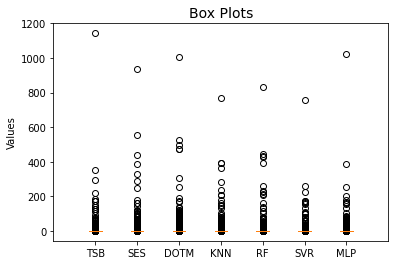

In [ ]:
fig, ax = plt.subplots()
plt.boxplot(errors['mae_tsb'], positions = [0.5])
plt.boxplot(errors['mae_ses'], positions = [1])
plt.boxplot(errors['mae_dotm'], positions = [1.5])
plt.boxplot(errors['mae_knn'], positions = [2])
plt.boxplot(errors['mae_rf'], positions = [2.5])
plt.boxplot(errors['mae_svr'], positions = [3])
plt.boxplot(errors['mae_mlp'], positions = [3.5])
plt.title("Box Plots",fontsize=14)
plt.ylabel('Values')
plt.xticks([0.5,1,1.5,2,2.5,3,3.5], ['TSB', 'SES','DOTM','KNN','RF','SVR','MLP']);

In [ ]:
#HERE ARE FEW VISUALS 
# YOU CAN MODIFY THEM AS NEEDED
# HERE IS THE DOCUMENTATION
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

AttributeError: ignored

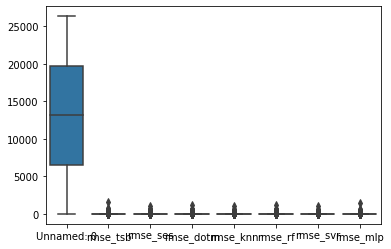

In [ ]:
ax = sns.boxplot(data=rmse_df)
ax.yl
plt.show()

In [ ]:
# ax = sns.boxplot(data=rmse_df,color='b')
# ax = sns.violinplot(data=rmse_df, inner=None)
# plt.show()

In [ ]:
ax = sns.boxplot(data=mae_df,color='r')
plt.show()

In [ ]:
 fig, ax = plt.subplots()
plt.boxplot(errors['mae_tsb'], positions = [0.5])
 plt.boxplot(errors['mae_ses'], positions = [1])
 plt.boxplot(errors['mae_dotm'], positions = [1.5])
 plt.boxplot(errors['mae_knn'], positions = [2])
 plt.boxplot(errors['mae_rf'], positions = [2.5])
 plt.boxplot(errors['mae_svr'], positions = [3])
 plt.boxplot(errors['mae_mlp'], positions = [3.5])
 plt.title("Box Plots",fontsize=14)
 plt.ylabel('Values')
 plt.xticks([0.5,1,1.5,2,2.5,3,3.5], ['TSB', 'SES','DOTM','KNN','RF','SVR','MLP']);

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# ax = sns.boxplot(data=rmse_df, color='blue')
# ax = sns.swarmplot(data=rmse_df, color='orange')
# plt.show()